# **IMPORTING LIBRARIES**

In [12]:
import pandas as pd
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
import tensorflow as tf


gpus = tf.config.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        print(f"✅ GPU Detected: {gpus[0].name}")
        print("   Memory Growth: Enabled")
    except RuntimeError as e:
        print(e)
else:
    print("No GPU found. Check your installation.")
print(tf.config.list_physical_devices('GPU'))



Physical devices cannot be modified after being initialized
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [13]:
# import tensorflow as tf
# import sys

# print(f"Python Version: {sys.version}")
# print(f"TensorFlow Version: {tf.__version__}")

# # Ask TensorFlow what CUDA/cuDNN versions it was built for
# build_info = tf.sysconfig.get_build_info()

# print("\n--- Compatibility Check ---")
# print(f"TensorFlow expects CUDA Version:  {build_info.get('cuda_version', 'Unknown')}")
# print(f"TensorFlow expects cuDNN Version: {build_info.get('cudnn_version', 'Unknown')}")

# print(f"\nIs GPU Available? {tf.config.list_physical_devices('GPU')}")

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

In [15]:

# Define paths
DATA_DIR = Path("data")
TRAIN_CSV = DATA_DIR / "train.csv"
TEST_CSV = DATA_DIR / "test.csv"
TRAIN_IMG_DIR = DATA_DIR / "train"
TEST_IMG_DIR = DATA_DIR / "test"
CLASSES_TXT = DATA_DIR / "classes.txt"

# Load CSV data
train_df = pd.read_csv(TRAIN_CSV)
test_df = pd.read_csv(TEST_CSV)
with open(CLASSES_TXT, 'r') as f:
    classes_list = [line.strip() for line in f.readlines()]

print(f"Training samples: {len(train_df)}")
print(f"Test samples: {len(test_df)}")
print(f"Number of classes: {len(classes_list)}")
print(f"\nTrain DataFrame:")
train_df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'data/train.csv'

# **DATA CLEANING**


In [ ]:
import os
train_df['path'] = train_df['path'].apply(lambda x: os.path.join(DATA_DIR, x))

In [ ]:
train_df.head()
train_df.shape

(10911, 3)

In [ ]:
train_df = train_df[train_df['path'].apply(os.path.exists)]
train_df.shape

(10796, 3)

# **DATA ANALISIS** and **DATA VISUALIZATION**

In [ ]:
classes_list

['ADONIS',
 'AFRICAN GIANT SWALLOWTAIL',
 'AMERICAN SNOOT',
 'AN 88',
 'APPOLLO',
 'ARCIGERA FLOWER MOTH',
 'ATALA',
 'ATLAS MOTH',
 'BANDED ORANGE HELICONIAN',
 'BANDED PEACOCK',
 'BANDED TIGER MOTH',
 'BECKERS WHITE',
 'BIRD CHERRY ERMINE MOTH',
 'BLACK HAIRSTREAK',
 'BLUE MORPHO',
 'BLUE SPOTTED CROW',
 'BROOKES BIRDWING',
 'BROWN ARGUS',
 'BROWN SIPROETA',
 'CABBAGE WHITE',
 'CAIRNS BIRDWING',
 'CHALK HILL BLUE',
 'CHECQUERED SKIPPER',
 'CHESTNUT',
 'CINNABAR MOTH',
 'CLEARWING MOTH',
 'CLEOPATRA',
 'CLODIUS PARNASSIAN',
 'CLOUDED SULPHUR',
 'COMET MOTH',
 'COMMON BANDED AWL',
 'COMMON WOOD-NYMPH',
 'COPPER TAIL',
 'CRECENT',
 'CRIMSON PATCH',
 'DANAID EGGFLY',
 'EASTERN COMA',
 'EASTERN DAPPLE WHITE',
 'EASTERN PINE ELFIN',
 'ELBOWED PIERROT',
 'EMPEROR GUM MOTH',
 'GARDEN TIGER MOTH',
 'GIANT LEOPARD MOTH',
 'GLITTERING SAPPHIRE',
 'GOLD BANDED',
 'GREAT EGGFLY',
 'GREAT JAY',
 'GREEN CELLED CATTLEHEART',
 'GREEN HAIRSTREAK',
 'GREY HAIRSTREAK',
 'HERCULES MOTH',
 'HUMMING BIRD H

In [ ]:
for class_name in classes_list:
    print(train_df['label'].value_counts().get(class_name, 0), class_name)

115 ADONIS
90 AFRICAN GIANT SWALLOWTAIL
95 AMERICAN SNOOT
101 AN 88
106 APPOLLO
131 ARCIGERA FLOWER MOTH
123 ATALA
121 ATLAS MOTH
124 BANDED ORANGE HELICONIAN
91 BANDED PEACOCK
120 BANDED TIGER MOTH
94 BECKERS WHITE
122 BIRD CHERRY ERMINE MOTH
110 BLACK HAIRSTREAK
93 BLUE MORPHO
109 BLUE SPOTTED CROW
141 BROOKES BIRDWING
143 BROWN ARGUS
122 BROWN SIPROETA
110 CABBAGE WHITE
103 CAIRNS BIRDWING
125 CHALK HILL BLUE
110 CHECQUERED SKIPPER
112 CHESTNUT
114 CINNABAR MOTH
104 CLEARWING MOTH
108 CLEOPATRA
107 CLODIUS PARNASSIAN
118 CLOUDED SULPHUR
95 COMET MOTH
104 COMMON BANDED AWL
112 COMMON WOOD-NYMPH
116 COPPER TAIL
124 CRECENT
92 CRIMSON PATCH
115 DANAID EGGFLY
115 EASTERN COMA
117 EASTERN DAPPLE WHITE
112 EASTERN PINE ELFIN
96 ELBOWED PIERROT
118 EMPEROR GUM MOTH
105 GARDEN TIGER MOTH
114 GIANT LEOPARD MOTH
110 GLITTERING SAPPHIRE
95 GOLD BANDED
88 GREAT EGGFLY
112 GREAT JAY
105 GREEN CELLED CATTLEHEART
148 GREEN HAIRSTREAK
110 GREY HAIRSTREAK
118 HERCULES MOTH
122 HUMMING BIRD HAWK MOTH

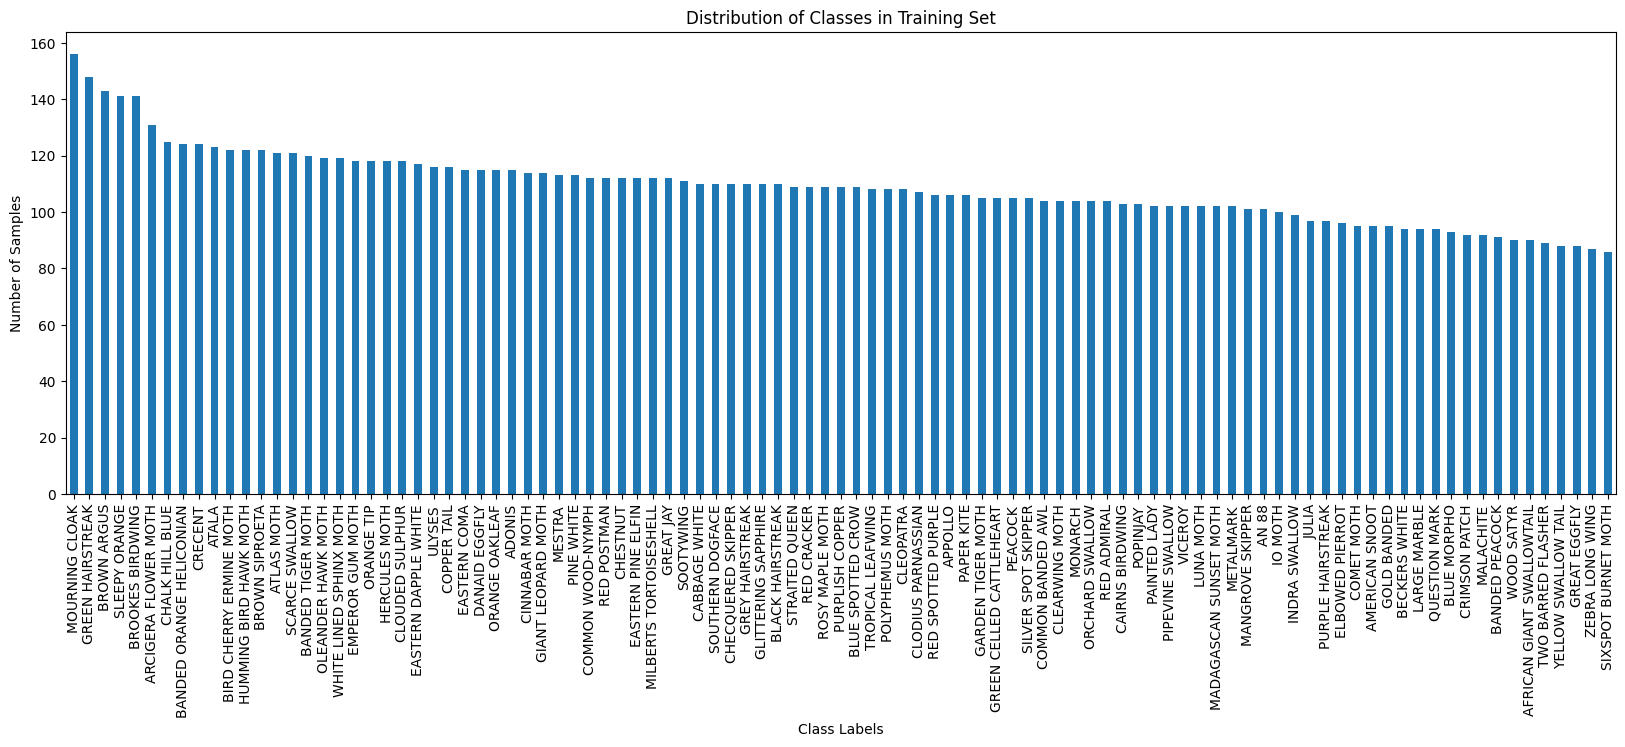

In [ ]:
plt.figure(figsize=(20, 6))
train_df['label'].value_counts().plot(kind='bar')
plt.title('Distribution of Classes in Training Set')
plt.xlabel('Class Labels')
plt.ylabel('Number of Samples')
plt.show()

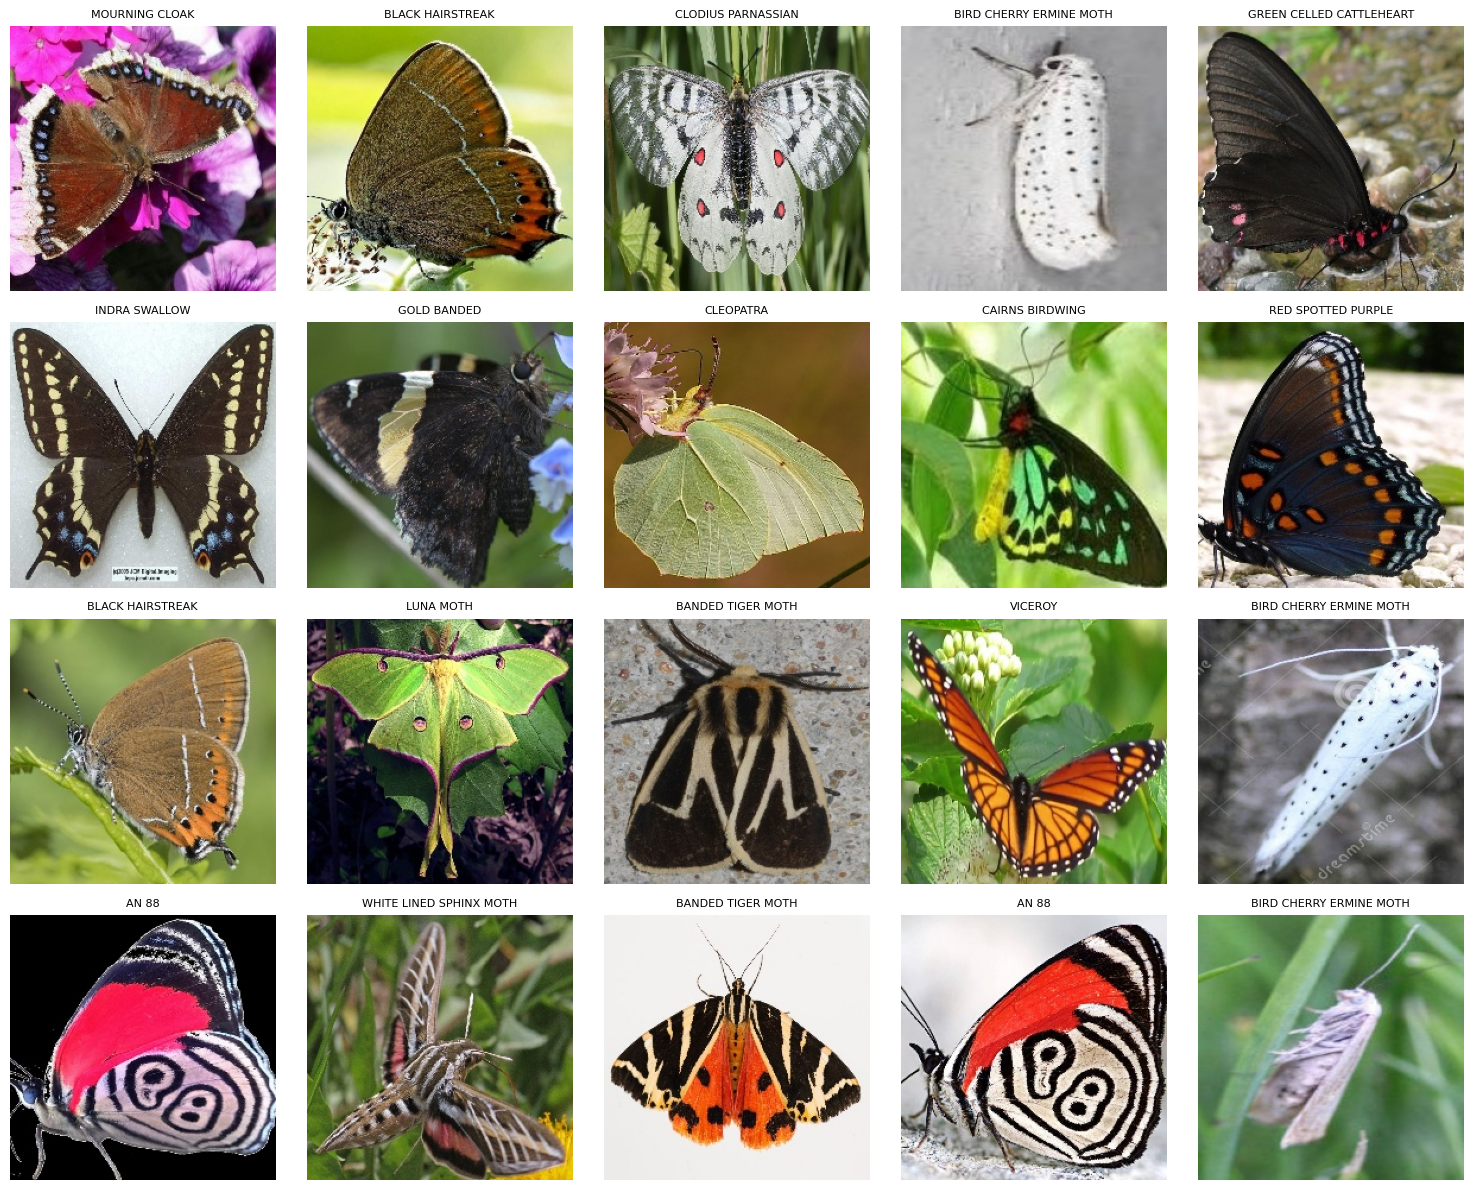

In [ ]:
from PIL import Image

fig, axes = plt.subplots(4, 5, figsize=(15, 12))
axes = axes.flatten()

# Sample random images from the training set
sample_indices = np.random.choice(len(train_df), size=20, replace=False)

for idx, ax in enumerate(axes):
    img_path = train_df.iloc[sample_indices[idx]]['path']
    img = Image.open(img_path)
    ax.imshow(img)
    ax.set_title(train_df.iloc[sample_indices[idx]]['label'], fontsize=8)
    ax.axis('off')
    

plt.tight_layout()
plt.show()

In [ ]:
image_sizes = []
for img_path in train_df['path'][:1000]:  
    full_path =  img_path
    with Image.open(full_path) as img:
        image_sizes.append(img.size)

unique_sizes = set(image_sizes)
print(f"Number of unique image sizes: {len(unique_sizes)}")
print(f"Unique sizes found: {unique_sizes}")

from collections import Counter
size_counts = Counter(image_sizes)
print(f"\nSize distribution:")
for size, count in size_counts.most_common(10):
    print(f"{size}: {count} images")

Number of unique image sizes: 1
Unique sizes found: {(224, 224)}

Size distribution:
(224, 224): 1000 images


In [ ]:
from sklearn.model_selection import train_test_split 


batch_size = 32
img_height = 224
img_width = 224

train_ds = tf.keras.utils.image_dataset_from_directory(
  TRAIN_IMG_DIR,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size
  )

train_ds


Found 10911 files belonging to 100 classes.
Using 8729 files for training.


I0000 00:00:1764241285.218706 1300528 gpu_device.cc:2020] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 5561 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4060, pci bus id: 0000:01:00.0, compute capability: 8.9


<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [ ]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  TRAIN_IMG_DIR,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)



Found 10911 files belonging to 100 classes.
Using 2182 files for validation.


100%|██████████| 273/273 [00:00<00:00, 294.55it/s]


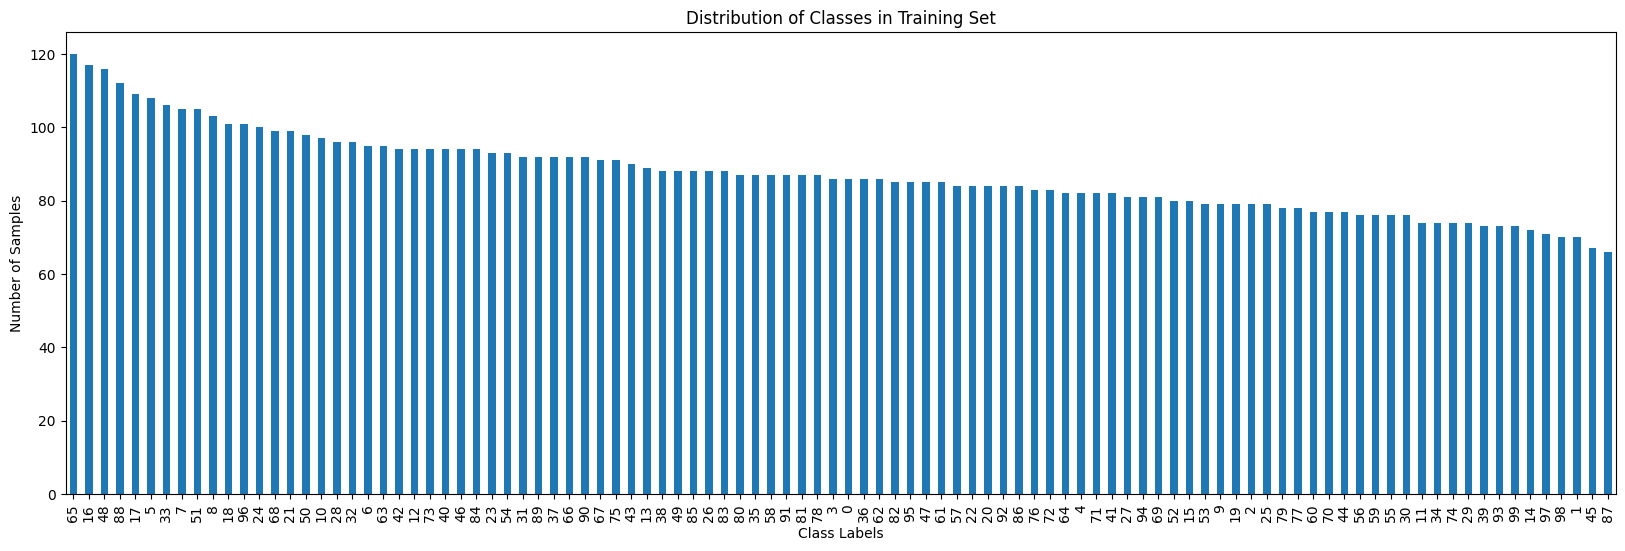

In [ ]:
from tqdm import tqdm 
train_labels = []

for images, labels in tqdm(train_ds):
    train_labels.extend(labels.numpy())

series_labels = pd.Series(train_labels)
train_distribution = series_labels.value_counts()
plt.figure(figsize=(20, 6))
train_distribution.plot(kind='bar')
plt.title('Distribution of Classes in Training Set')
plt.xlabel('Class Labels')
plt.ylabel('Number of Samples')
plt.show()

100%|██████████| 273/273 [00:00<00:00, 488.41it/s]


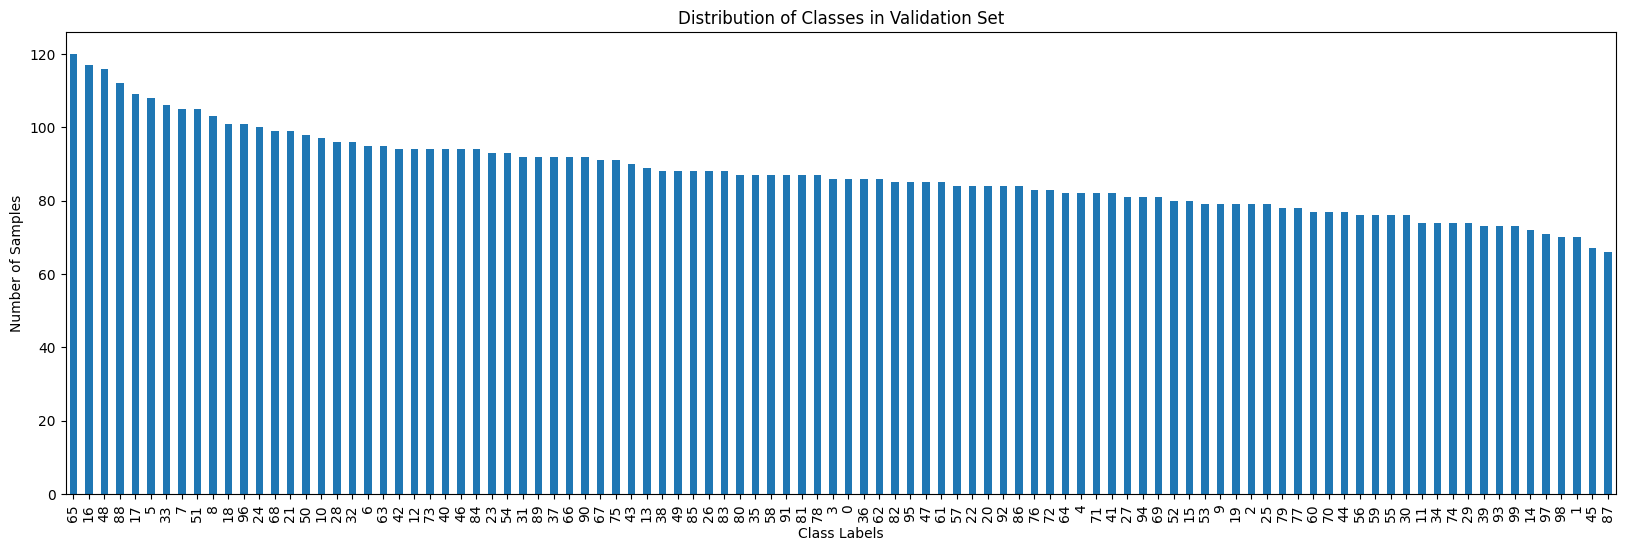

In [ ]:
val_labels = []

for images, labels in tqdm(train_ds):
    val_labels.extend(labels.numpy())

series_labels = pd.Series(train_labels)
val_distribution = series_labels.value_counts()
plt.figure(figsize=(20, 6))
val_distribution.plot(kind='bar')
plt.title('Distribution of Classes in Validation Set')
plt.xlabel('Class Labels')
plt.ylabel('Number of Samples')
plt.show()

In [ ]:
from tensorflow.keras import layers

data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    
    layers.RandomRotation(0.2),
    
    layers.RandomZoom(0.2),
    
    layers.RandomContrast(0.4),
    
    layers.RandomBrightness([-0.5,0.5])
])

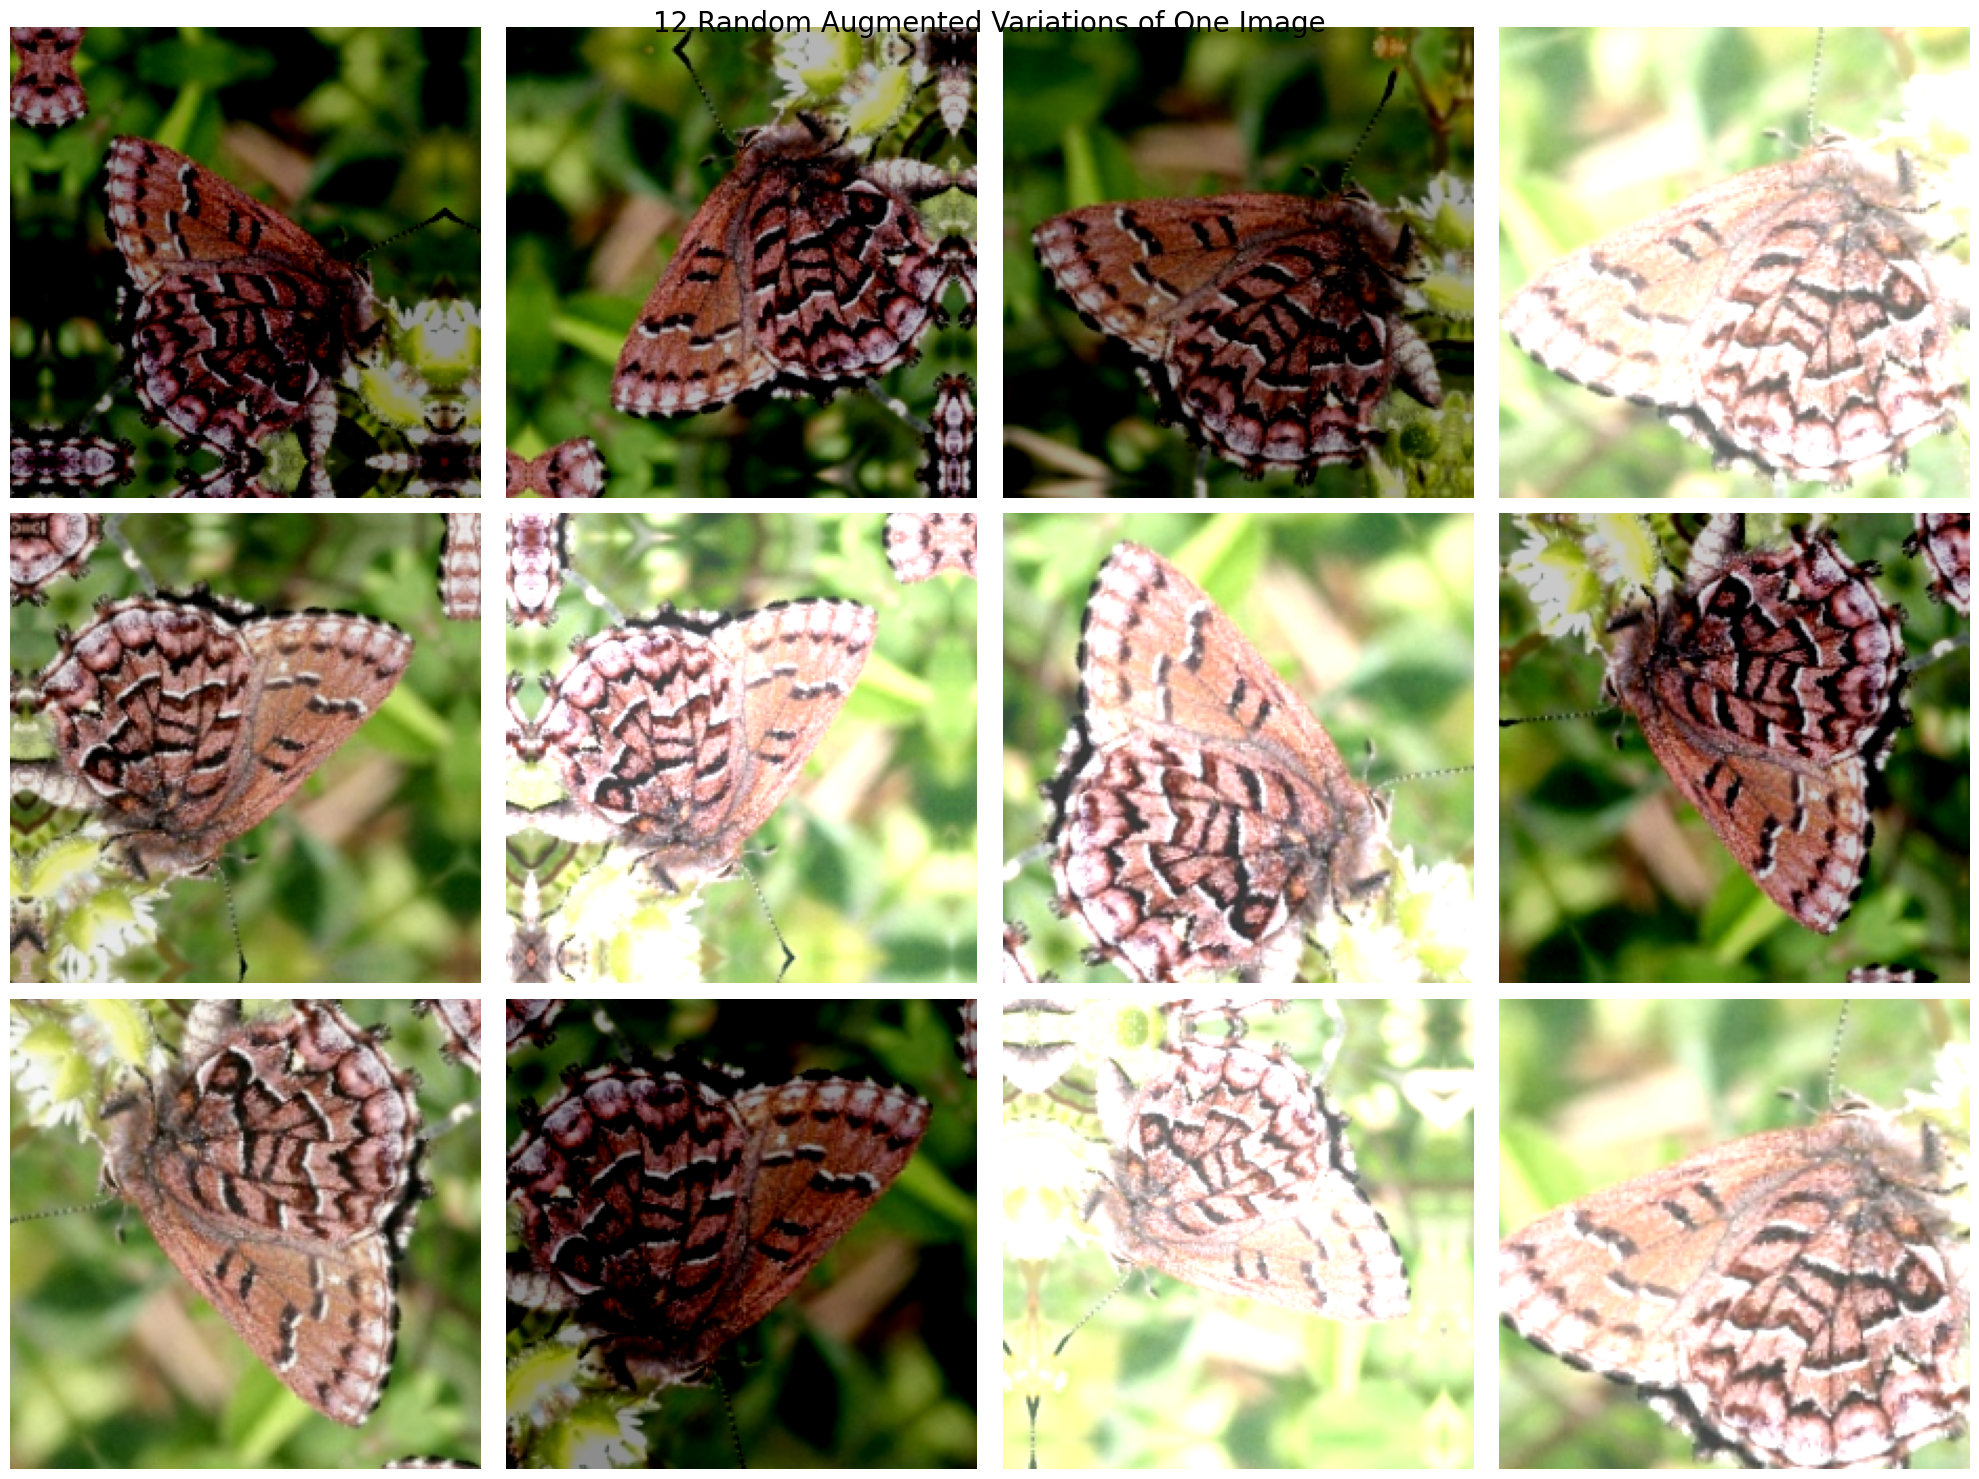

In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf

for images, labels in train_ds.take(1):
    original_image = images[0]
    break

plt.figure(figsize=(20, 20)) 

for i in range(12):
    ax = plt.subplot(4, 4, i + 1)
    
    aug_img = data_augmentation(tf.expand_dims(original_image, 0), training=True)
    
    plt.imshow(aug_img[0].numpy().astype("uint8"))
    plt.axis("off") 

plt.suptitle("12 Random Augmented Variations of One Image", fontsize=20)
plt.tight_layout()
plt.show()

In [2]:
import os
os.environ["TF_GPU_ALLOCATOR"] = "cuda_malloc_async"

import tensorflow as tf
import gc

tf.keras.backend.clear_session()

gc.collect()
import sys, os

PROJECT_ROOT = os.path.abspath("..")  # adjust if needed
sys.path.insert(0, PROJECT_ROOT)

print("✅ RAM and GPU Memory Cleared.")

2025-11-28 13:59:54.573903: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-11-28 13:59:54.619780: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI AVX512_BF16 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-11-28 13:59:55.591112: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


✅ RAM and GPU Memory Cleared.


In [3]:
from src.models import get_model
from src.ButterflyTrainer import ButterflyTrainer 
from src.config_schema import ModelConfig, TrainConfig
from src.data import load_train_val_from_directory
from src.augmentation import get_augment_layer 
import mlflow
from tensorflow.keras import mixed_precision

# 1. Enable Mixed Precision globally
mixed_precision.set_global_policy('mixed_float16')

/home/oleksandr/ind1_deeplearning/venv/lib/python3.12/site-packages/tensorflow_hub/__init__.py:61: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import parse_version
2025/11/28 13:59:57 INFO mlflow.store.db.utils: Creating initial MLflow database tables...
2025/11/28 13:59:57 INFO mlflow.store.db.utils: Updating database tables
2025-11-28 13:59:57 INFO  [alembic.runtime.migration] Context impl SQLiteImpl.
2025-11-28 13:59:57 INFO  [alembic.runtime.migration] Will assume non-transactional DDL.
2025-11-28 13:59:57 INFO  [alembic.runtime.migration] Context impl SQLiteImpl.
2025-11-28 13:59:57 INFO  [alembic.runtime.migration] Will assume non-transactional DDL.


MLflow setup complete. Tracking to: sqlite:////home/oleksandr/ind1_deeplearning/mlflow.db


In [4]:
print("Loading Data...")
train_ds, val_ds, _ = load_train_val_from_directory(batch_size=32)

Loading Data...


I0000 00:00:1764338398.383946  335462 gpu_process_state.cc:208] Using CUDA malloc Async allocator for GPU: 0
I0000 00:00:1764338398.384497  335462 gpu_device.cc:2020] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 5561 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4060, pci bus id: 0000:01:00.0, compute capability: 8.9


In [5]:
from src.models import MODEL_REGISTRY

print("Available Models:")
for model_name in MODEL_REGISTRY.keys():
    print(f"- {model_name}")

candidate_models = list(MODEL_REGISTRY.keys())
print(candidate_models)

Available Models:
- alexnet
- lenet
- vggnet_custom
- vgg16_imagenet
- efficientnet_b0
- efficientnet_b3
- convnext_tiny
- convnext_small
- convnext_base
- effnetv2_b0_21k
['alexnet', 'lenet', 'vggnet_custom', 'vgg16_imagenet', 'efficientnet_b0', 'efficientnet_b3', 'convnext_tiny', 'convnext_small', 'convnext_base', 'effnetv2_b0_21k']


In [6]:
for model_name in candidate_models[4:]:
    print(f"\n=== Evaluating: {model_name} ===")
    
    tf.keras.backend.clear_session()
    
    train_config = TrainConfig(
        epochs=10,               
        batch_size=32,
        learning_rate=3e-4,
        use_mlflow=True
    )
    
    model_config = ModelConfig(
        model_name=model_name,
        input_shape=(224, 224, 3),
        num_classes=100,
        dropout_rate=0.5,      
        train_backbone=False,
        augmentation_layer=get_augment_layer() 
    )

    try:
        model = get_model(
            model_name=model_config.model_name,
            input_shape=model_config.input_shape,
            num_classes=model_config.num_classes,
            dropout_rate=model_config.dropout_rate,
            augmentation_layer=model_config.augmentation_layer
        )
        
        with mlflow.start_run(run_name=f"SCREEN_{model_name}") as run:
            mlflow.log_params({"candidate_type": "screening"})
            
            trainer = ButterflyTrainer(model, train_ds, val_ds, train_config)
            trainer.compile()
            trainer.train()
            run_id = run.info.run_id
            
            unique_name = f"{model_name}_{run_id}.keras"
            save_path = os.path.join("models", unique_name) 
            
            os.makedirs("models", exist_ok=True)
            
            print(f"💾 Saving model to: {save_path}")
            model.save(save_path)
            
            mlflow.log_artifact(save_path)
            
    except Exception as e:
        raise e
        print(f"❌ Failed to train {model_name}: {e}")

print("\n✅ Screening Complete! Check MLflow UI to pick the winner.")


=== Evaluating: efficientnet_b0 ===


2025-11-28 14:00:04.793142: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2025-11-28 14:00:05.394517: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 1/10


2025-11-28 14:00:11.314921: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:473] Loaded cuDNN version 91600


 64/273 ━━━━━━━━━━━━━━━━━━━━ 14s 71ms/step - accuracy: 0.0156 - loss: 5.7946 - top_5_acc: 0.0814

KeyboardInterrupt: 

In [7]:
from src.cv_optuna import run_study

WINNER_MODEL = "efficientnet_b0" 

tf.keras.backend.clear_session()


run_study(
    n_trials=15,    
    n_splits=1,         
    model_name=WINNER_MODEL,
    epochs=10                
)

/home/oleksandr/ind1_deeplearning/venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[I 2025-11-28 14:00:20,091] A new study created in memory with name: butterfly_optuna_efficientnet_b0


Model 'efficientnet_b0' initialized. EfficientNet_ImageNet


Model: "EfficientNet_ImageNet"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ data_augmentation (Sequential)  │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ efficientnetb0 (Functional)     │ (None, 7, 7, 1280)     │     4,049,571 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 1280)           │         5,120 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │       128,100 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,182,791 (15.96 MB)

 Trainable params: 130,660 (510.39 KB)

 Non-trainable params: 4,052,131 (15.46 MB)

Epoch 1/10


2025/11/28 14:00:22 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during tensorflow autologging: Changing param values is not allowed. Params were already logged='[{'key': 'batch_size', 'old_value': '32', 'new_value': 'None'}]' for run ID='31fedf5e43ae448e96d1cf6906d7282a'.
[W 2025-11-28 14:00:22,811] Trial 0 failed with parameters: {'lr': 7.587941439402122e-05, 'dropout': 0.4978618202354041, 'batch_size': 32, 'train_backbone': False} because of the following error: KeyboardInterrupt().
Traceback (most recent call last):
  File "/home/oleksandr/ind1_deeplearning/venv/lib/python3.12/site-packages/optuna/study/_optimize.py", line 205, in _run_trial
    value_or_values = func(trial)
                      ^^^^^^^^^^^
  File "/home/oleksandr/ind1_deeplearning/src/cv_optuna.py", line 159, in <lambda>
    lambda t: objective(
              ^^^^^^^^^^
  File "/home/oleksandr/ind1_deeplearning/src/cv_optuna.py", line 123, in objective
    history = trainer.train()
       

KeyboardInterrupt: 

In [ ]:
tf.keras.backend.clear_session()
train_ds, val_ds, _ = load_train_val_from_directory(batch_size=16)
train_config = TrainConfig(
    epochs=10,               
    batch_size=16,
    learning_rate=6.761040877813161e-05,
    use_mlflow=False
)

model_config = ModelConfig(
    model_name="efficientnet_b0",
    input_shape=(224, 224, 3),
    num_classes=100,
    dropout_rate=0.20609185624518492,
    train_backbone=True,
    augmentation_layer=get_augment_layer() 
)

try:
    model = get_model(
        model_name=model_config.model_name,
        input_shape=model_config.input_shape,
        num_classes=model_config.num_classes,
        dropout_rate=model_config.dropout_rate,
        augmentation_layer=model_config.augmentation_layer
    )
    model.summary()
    
    with mlflow.start_run(run_name=f"fine_tuned_{model_name}") as run:
        mlflow.log_params({"candidate_type": "screening"})
        
        trainer = ButterflyTrainer(model, train_ds, val_ds, train_config)
        trainer.compile()
        trainer.train()
        run_id = run.info.run_id
        
        unique_name = f"{model_name}_{run_id}.keras"
        save_path = os.path.join("models", unique_name) 
        
        os.makedirs("models", exist_ok=True)
        
        print(f"💾 Saving model to: {save_path}")
        model.save(save_path)
        
        mlflow.log_artifact(save_path)
        
except Exception as e:
    raise e
    print(f"❌ Failed to train {model_name}: {e}")

Model: "EfficientNet_ImageNet"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ data_augmentation (Sequential)  │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ efficientnetb0 (Functional)     │ (None, 7, 7, 1280)     │     4,049,571 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 1280)           │         5,120 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │       128,100 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,182,791 (15.96 MB)

 Trainable params: 130,660 (510.39 KB)

 Non-trainable params: 4,052,131 (15.46 MB)

KeyboardInterrupt: 